In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plot
import scipy.optimize as optimize
sns.set_context('talk')

In [107]:
drates = pd.read_csv('../data/arrehnius_parameters.csv', sep='\t', index_col='Temperature')
drates.groupby(['Compound', 'Temperature']).mean()

Rate (%)    Rate (1/s)  Temperature (K)   prefactor_A  \
Compound Temperature                                                          
ATP      50           0.018567  3.094444e-06           323.15  2.125971e+13   
         75           0.191133  3.185556e-05           348.15  2.125971e+13   
         90           1.392000  2.320000e-04           363.15  2.125971e+13   
NAAD     50           0.003467  5.777778e-07           323.15  3.442913e+09   
         75           0.004367  7.277778e-07           348.15  3.442913e+09   
         90           0.027767  4.627778e-06           363.15  3.442913e+09   
NAD      50           0.002500  4.166667e-07           323.15  1.377735e+11   
         75           0.455533  7.592222e-05           348.15  1.377735e+11   
         90           1.603900  2.673167e-04           363.15  1.377735e+11   
NAR      50           0.010967  1.827778e-06           323.15  1.249148e+13   
         75           0.119533  1.992222e-05           348.15  1.249148e+13   
         90           0.868000  1.446667e-04           363.15  1.249148e+13   
NMN      50           0.074733  1.245556e-05           323.15  3.693681e+08   
         75           0.622933  1.038222e-04           348.15  3.693681e+08   
         90           2.761600  4.602667e-04           363.15  3.693681e+08   
NR       50           0.685367  1.142278e-04           323.15  2.708363e+04   
         75           2.065200  3.442000e-04           348.15  2.708363e+04   
         90           6.265333  1.044222e-03           363.15  2.708363e+04   
NaMN     50           0.001000  1.666667e-07           323.15  2.127997e+13   
         75           0.053467  8.911111e-06           348.15  2.127997e+13   
         90           0.408333  6.805556e-05           363.15  2.127997e+13   
Nam      50           0.010533  1.755556e-06           323.15  4.858703e-12   
         75           0.027800  4.633333e-06           348.15  4.858703e-12   
         90          -0.007867 -1.311111e-06           363.15  4.858703e-12   
NiA      50          -0.001067 -1.777778e-07           323.15  1.095760e-04   
         75           0.005267  8.777778e-07           348.15  1.095760e-04   
         90           0.003833  6.388889e-07           363.15  1.095760e-04   

                      activation_energy (KJ/mol)  
Compound Temperature                              
ATP      50                           138.785479  
         75                           138.785479  
         90                           138.785479  
NAAD     50                           124.255207  
         75                           124.255207  
         90                           124.255207  
NAD      50                           123.166750  
         75                           123.166750  
         90                           123.166750  
NAR      50                           138.605928  
         75                           138.605928  
         90                           138.605928  
NMN      50                           103.623475  
         75                           103.623475  
         90                           103.623475  
NR       50                            72.419203  
         75                            72.419203  
         90                            72.419203  
NaMN     50                           142.491202  
         75                           142.491202  
         90                           142.491202  
Nam      50                           -16.709424  
         75                           -16.709424  
         90                           -16.709424  
NiA      50                            35.729084  
         75                            35.729084  
         90                            35.729084

<AxesSubplot:xlabel='Temperature (K)', ylabel='Rate (1/s)'>

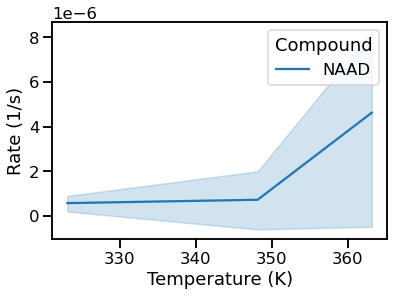

In [106]:
sns.lineplot(data=drates.loc[drates.Compound.isin(['NAAD'])], x='Temperature (K)', y='Rate (1/s)', hue='Compound')

In [98]:
#drates.loc[(drates.Compound=='NAAD'), 'Rate (1/s)'] = abs(drates[drates.Compound=='NAAD']['Rate (1/s)'])
#sns.lineplot(data=drates.loc[(drates.Compound=='NAAD') & (drates['Rate (%)']>=0)]['Rate (1/s)'])
thermolysisRate = drates.loc[(drates['Rate (%)']>=0)]
#thermolysisRate.loc[thermolysisRate.Compound == 'NAAD']['Rate (1/s)'].sort_values()
dr = fitArrheniusEquation(thermolysisRate.sort_values('Rate (1/s)'))

In [99]:
dr.groupby(['Compound', 'Temperature']).mean()

Rate (%)    Rate (1/s)  Temperature (K)   prefactor_A  \
Compound Temperature                                                          
ATP      50           0.018567  3.094444e-06           323.15  2.125971e+13   
         75           0.191133  3.185556e-05           348.15  2.125971e+13   
         90           1.392000  2.320000e-04           363.15  2.125971e+13   
NAAD     50           0.003467  5.777778e-07           323.15  1.647280e+07   
         75           0.008350  1.391667e-06           348.15  1.647280e+07   
         90           0.043100  7.183333e-06           363.15  1.647280e+07   
NAD      50           0.005600  9.333333e-07           323.15  2.679777e+15   
         75           0.455533  7.592222e-05           348.15  2.679777e+15   
         90           1.603900  2.673167e-04           363.15  2.679777e+15   
NAR      50           0.010967  1.827778e-06           323.15  1.249148e+13   
         75           0.119533  1.992222e-05           348.15  1.249148e+13   
         90           0.868000  1.446667e-04           363.15  1.249148e+13   
NMN      50           0.074733  1.245556e-05           323.15  4.835720e+08   
         75           0.622933  1.038222e-04           348.15  4.835720e+08   
         90           2.761600  4.602667e-04           363.15  4.835720e+08   
NR       50           0.685367  1.142278e-04           323.15  2.708363e+04   
         75           2.065200  3.442000e-04           348.15  2.708363e+04   
         90           6.265333  1.044222e-03           363.15  2.708363e+04   
NaMN     50           0.010950  1.825000e-06           323.15  1.761516e+13   
         75           0.053467  8.911111e-06           348.15  1.761516e+13   
         90           0.408333  6.805556e-05           363.15  1.761516e+13   
Nam      50           0.017650  2.941667e-06           323.15  5.780717e-02   
         75           0.052250  8.708333e-06           348.15  5.780717e-02   
         90           0.020950  3.491667e-06           363.15  5.780717e-02   
NiA      50           0.000950  1.583333e-07           323.15  1.136595e+00   
         75           0.005267  8.777778e-07           348.15  1.136595e+00   
         90           0.006200  1.033333e-06           363.15  1.136595e+00   

                      activation_energy (KJ/mol)  
Compound Temperature                              
ATP      50                           138.785479  
         75                           138.785479  
         90                           138.785479  
NAAD     50                           106.799362  
         75                           106.799362  
         90                           106.799362  
NAD      50                           152.849582  
         75                           152.849582  
         90                           152.849582  
NAR      50                           138.605928  
         75                           138.605928  
         90                           138.605928  
NMN      50                           104.607588  
         75                           104.607588  
         90                           104.607588  
NR       50                            72.419203  
         75                            72.419203  
         90                            72.419203  
NaMN     50                           141.920789  
         75                           141.920789  
         90                           141.920789  
Nam      50                            47.280738  
         75                            47.280738  
         90                            47.280738  
NiA      50                            61.815258  
         75                            61.815258  
         90                            61.815258

## Preprocessing of (experimental) thermolysis data

In [97]:
def fitArrheniusEquation(thermolysisRate, column_x='Temperature (K)', column_y='Rate (1/s)', **kwargs):
    for compound in set(thermolysisRate.Compound):
        xdata = thermolysisRate.loc[thermolysisRate.Compound == compound][column_x].sort_values()
        ydata = thermolysisRate.loc[thermolysisRate.Compound == compound][column_y].sort_values()
        if compound in ['NMN',]:
            sigma = np.ones(len(xdata))
            sigma[[3, -3]] = 0.01
            popt, pcov = optimize.curve_fit(f=arrheniusEquation, xdata=xdata, ydata=ydata, maxfev=10000000, sigma=sigma)
        elif compound in ['NAD',]:
            sigma = np.ones(len(xdata))
            sigma[[0, -1]] = 0.01
            popt, pcov = optimize.curve_fit(f=arrheniusEquation, xdata=xdata, ydata=ydata, maxfev=10000000, sigma=sigma)
        else:
            popt, pcov = optimize.curve_fit(f=arrheniusEquation, xdata=xdata, ydata=ydata, maxfev=10000000)
        thermolysisRate.loc[thermolysisRate.Compound == compound, 'prefactor_A'] = popt[0]/1000.
        thermolysisRate.loc[thermolysisRate.Compound == compound, 'activation_energy (KJ/mol)'] = popt[1]/1000.
    return thermolysisRate

In [18]:
def arrheniusEquation(T, A, Ea):
    R = 8.3145
    A = A * np.ones(len(T))
    Ea = Ea * np.ones(len(T))
    return A * np.exp(-Ea/(R * T))

In [4]:
drates = pd.read_csv('../data/NAD metabolite thermostability1.csv', sep=',')
drates = drates.drop(['Degradation rate (%/min)', 'Comment'], axis=1)
drates = drates.fillna('NiA')

In [5]:
drates = drates.melt(id_vars=["Compound", "Temperature"], var_name="Exp", value_name="Rate (%)")

In [6]:
drates['Rate (1/s)'] = drates['Rate (%)']/6000
drates['Temperature (K)'] = drates['Temperature'] + 273.15

In [130]:
fitArrheniusEquation(drates, column_y='Rate (1/s)')

,Compound,Temperature,Exp,Rate (%),Rate (1/s),Temperature (K),prefactor_A,activation_energy (KJ/mol)
0,Nam,50,Degradation rate (%/min).1,0.0245,4.083333e-06,323.15,4.858703e-12,-16.709424
1,Nam,75,Degradation rate (%/min).1,0.0311,5.183333e-06,348.15,4.858703e-12,-16.709424
2,Nam,90,Degradation rate (%/min).1,-0.0655,-1.091667e-05,363.15,4.858703e-12,-16.709424
3,NiA,50,Degradation rate (%/min).1,0.0011,1.833333e-07,323.15,1.095760e-04,35.729084
4,NiA,75,Degradation rate (%/min).1,0.0098,1.633333e-06,348.15,1.095760e-04,35.729084
...,...,...,...,...,...,...,...,...
76,NAAD,75,Degradation rate (%/min).3,0.0120,2.000000e-06,348.15,3.442913e+09,124.255207
77,NAAD,90,Degradation rate (%/min).3,0.0367,6.116667e-06,363.15,3.442913e+09,124.255207
78,ATP,50,Degradation rate (%/min).3,0.0324,5.400000e-06,323.15,2.125971e+13,138.785479
79,ATP,75,Degradation rate (%/min).3,0.1974,3.290000e-05,348.15,2.125971e+13,138.785479


In [63]:
drates.groupby(['Compound', 'Temperature']).mean()#.std()

Rate (%)    Rate (1/s)  Temperature (K)   prefactor_A  \
Compound Temperature                                                          
ATP      50           0.018567  3.094444e-06           323.15  2.125971e+13   
         75           0.191133  3.185556e-05           348.15  2.125971e+13   
         90           1.392000  2.320000e-04           363.15  2.125971e+13   
NAAD     50           0.003467  5.777778e-07           323.15  3.442913e+09   
         75           0.004367  7.277778e-07           348.15  3.442913e+09   
         90           0.027767  4.627778e-06           363.15  3.442913e+09   
NAD      50           0.002500  4.166667e-07           323.15  1.377735e+11   
         75           0.455533  7.592222e-05           348.15  1.377735e+11   
         90           1.603900  2.673167e-04           363.15  1.377735e+11   
NAR      50           0.010967  1.827778e-06           323.15  1.249148e+13   
         75           0.119533  1.992222e-05           348.15  1.249148e+13   
         90           0.868000  1.446667e-04           363.15  1.249148e+13   
NMN      50           0.074733  1.245556e-05           323.15  3.693681e+08   
         75           0.622933  1.038222e-04           348.15  3.693681e+08   
         90           2.761600  4.602667e-04           363.15  3.693681e+08   
NR       50           0.685367  1.142278e-04           323.15  2.708363e+04   
         75           2.065200  3.442000e-04           348.15  2.708363e+04   
         90           6.265333  1.044222e-03           363.15  2.708363e+04   
NaMN     50           0.001000  1.666667e-07           323.15  2.127997e+13   
         75           0.053467  8.911111e-06           348.15  2.127997e+13   
         90           0.408333  6.805556e-05           363.15  2.127997e+13   
Nam      50           0.010533  1.755556e-06           323.15  4.858703e-12   
         75           0.027800  4.633333e-06           348.15  4.858703e-12   
         90          -0.007867 -1.311111e-06           363.15  4.858703e-12   
NiA      50          -0.001067 -1.777778e-07           323.15  1.095760e-04   
         75           0.005267  8.777778e-07           348.15  1.095760e-04   
         90           0.003833  6.388889e-07           363.15  1.095760e-04   

                      activation_energy (KJ/mol)  
Compound Temperature                              
ATP      50                           138.785479  
         75                           138.785479  
         90                           138.785479  
NAAD     50                           124.255207  
         75                           124.255207  
         90                           124.255207  
NAD      50                           123.166750  
         75                           123.166750  
         90                           123.166750  
NAR      50                           138.605928  
         75                           138.605928  
         90                           138.605928  
NMN      50                           103.623475  
         75                           103.623475  
         90                           103.623475  
NR       50                            72.419203  
         75                            72.419203  
         90                            72.419203  
NaMN     50                           142.491202  
         75                           142.491202  
         90                           142.491202  
Nam      50                           -16.709424  
         75                           -16.709424  
         90                           -16.709424  
NiA      50                            35.729084  
         75                            35.729084  
         90                            35.729084

In [32]:
drates[drates.Compound=='NAAD'].groupby('Temperature').std()

,Rate (%),Rate (1/s),Temperature (K),prefactor_A,activation_energy (KJ/mol)
Temperature,,,,,
50,0.002120,3.532914e-07,0.0,0.0,0.0
75,0.007805,1.300890e-06,0.0,0.0,0.0
90,0.027318,4.553062e-06,0.0,0.0,0.0


In [143]:
drates.loc[drates.Compound=='NAMN', 'Compound'] = 'NaMN'

In [144]:
drates.to_csv('../data/arrehnius_parameters.csv', sep='\t', index=False)